kNN Results:
Accuracy: 0.9869791666666666
Precision: 1.0
Recall: 0.9838709677419355
F1 Score: 0.991869918699187
ROC AUC: 0.9983870967741936
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        74
           1       1.00      0.98      0.99       310

    accuracy                           0.99       384
   macro avg       0.97      0.99      0.98       384
weighted avg       0.99      0.99      0.99       384


------------------------------------------------------------

SVM Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00       310

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384


------------------------------------------------------------


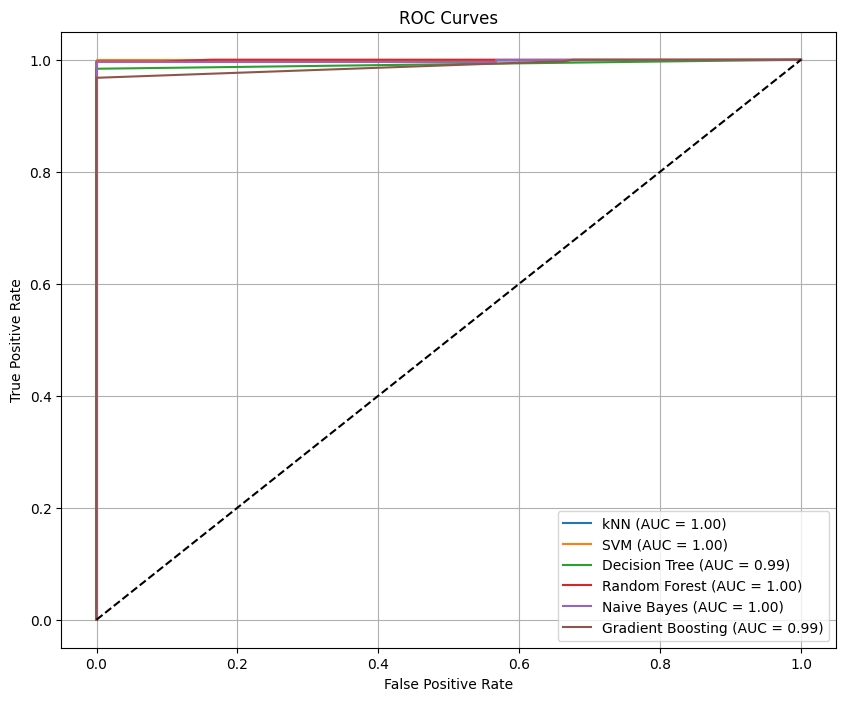

Model Comparison:
                   Accuracy  Precision    Recall  F1 Score   ROC AUC
kNN                0.986979        1.0  0.983871  0.991870  0.998387
SVM                1.000000        1.0  1.000000  1.000000  1.000000
Decision Tree      0.986979        1.0  0.983871  0.991870  0.991935
Random Forest      0.984375        1.0  0.980645  0.990228  0.999586
Naive Bayes        0.997396        1.0  0.996774  0.998384  0.998169
Gradient Boosting  0.973958        1.0  0.967742  0.983607  0.988426


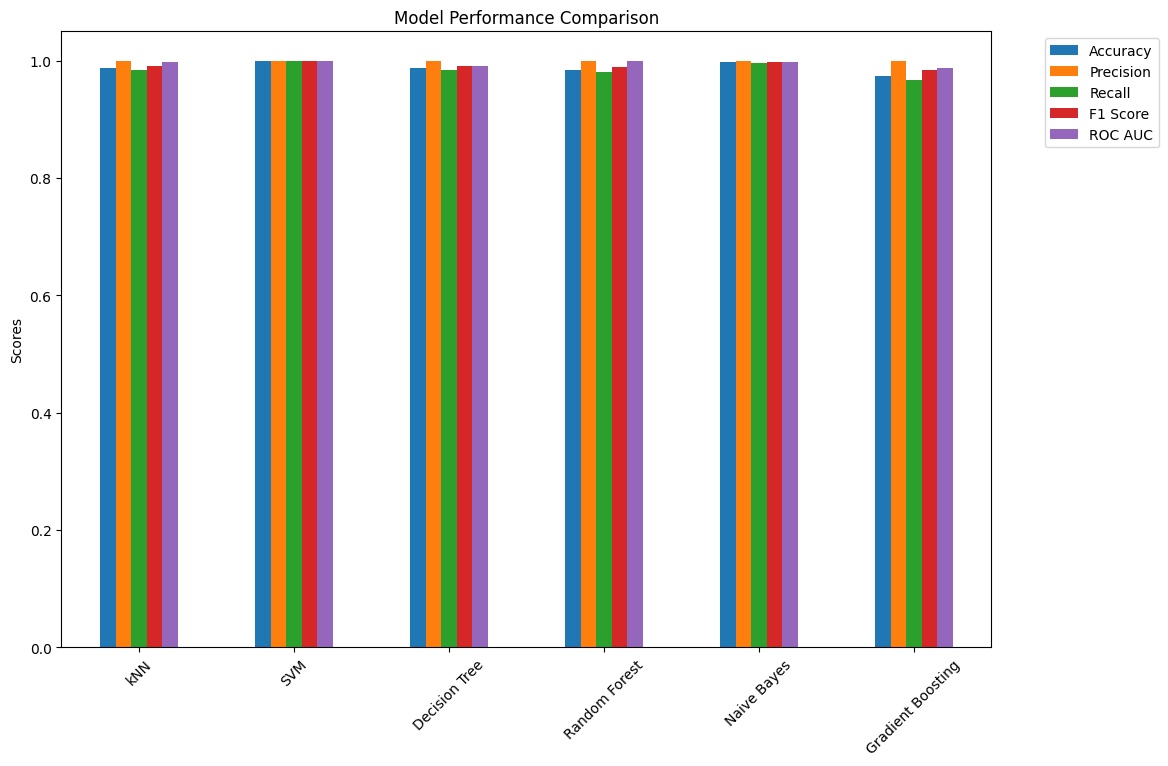

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression

# Step 1: Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Step 2: Preprocessing
X = df.drop(['Disease_Risk'], axis=1)
y = df['Disease_Risk']

# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Model Definitions
# Create a dictionary to store models and their results
models = {
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
roc_auc_curves = plt.figure(figsize=(10, 8))

# Step 4: Train and Evaluate Models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' or 'weighted' depending on your target class
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC: {roc_auc}")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*60 + "\n")
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Step 5: Add Labels to ROC Curve
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 6: Display a DataFrame of the results
results_df = pd.DataFrame(results).T  # Transpose to make models as rows
print("Model Comparison:")
print(results_df)

# Optionally, visualize the comparison
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [2]:
# Step 7: Create best models summary dynamically
best_models = pd.DataFrame({
    'Metric': results_df.columns,
    'Best Model': [results_df[col].idxmax() for col in results_df.columns],
    'Best Score': [results_df[col].max() for col in results_df.columns]
})

# Format the Best Score column to display as decimal numbers
best_models['Best Score'] = best_models['Best Score'].map('{:.4f}'.format)

# Define column widths for alignment
metric_width = max(best_models['Metric'].apply(len).max(), len("Metric"))
model_width = max(best_models['Best Model'].apply(len).max(), len("Best Model"))
score_width = max(best_models['Best Score'].apply(len).max(), len("Best Score"))

# Print the formatted table with column widths
print("\nBest Model for Each Metric:")
print(f"{'Metric'.ljust(metric_width)}  {'Best Model'.ljust(model_width)}  {'Best Score'.rjust(score_width)}")
print("-" * (metric_width + model_width + score_width + 4))

for index, row in best_models.iterrows():
    print(f"{row['Metric'].ljust(metric_width)}  {row['Best Model'].ljust(model_width)}  {row['Best Score'].rjust(score_width)}")



Best Model for Each Metric:
Metric     Best Model  Best Score
---------------------------------
Accuracy   SVM             1.0000
Precision  kNN             1.0000
Recall     SVM             1.0000
F1 Score   SVM             1.0000
ROC AUC    SVM             1.0000


Stacking Classifier Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00       310

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



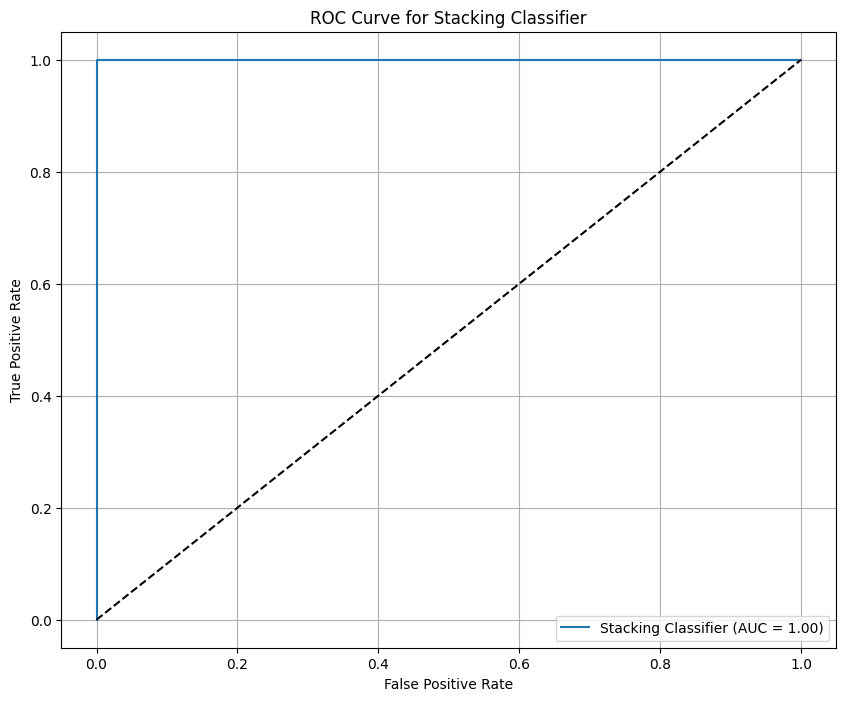

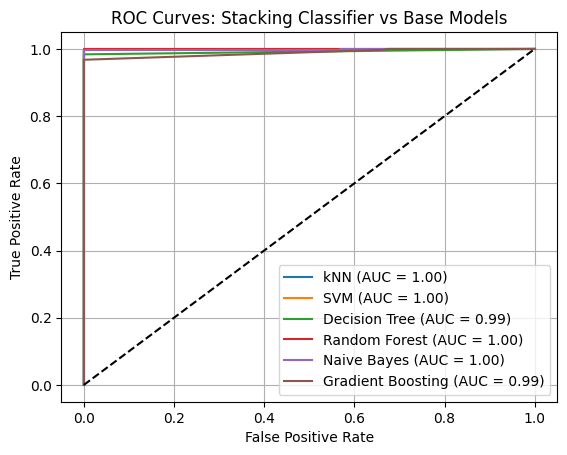

Model Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Stacking Classifier  1.000000        1.0  1.000000  1.000000  1.000000
kNN                  0.986979        1.0  0.983871  0.991870  0.998387
SVM                  1.000000        1.0  1.000000  1.000000  1.000000
Decision Tree        0.986979        1.0  0.983871  0.991870  0.991935
Random Forest        0.984375        1.0  0.980645  0.990228  1.000000
Naive Bayes          0.997396        1.0  0.996774  0.998384  0.998169
Gradient Boosting    0.973958        1.0  0.967742  0.983607  0.988426


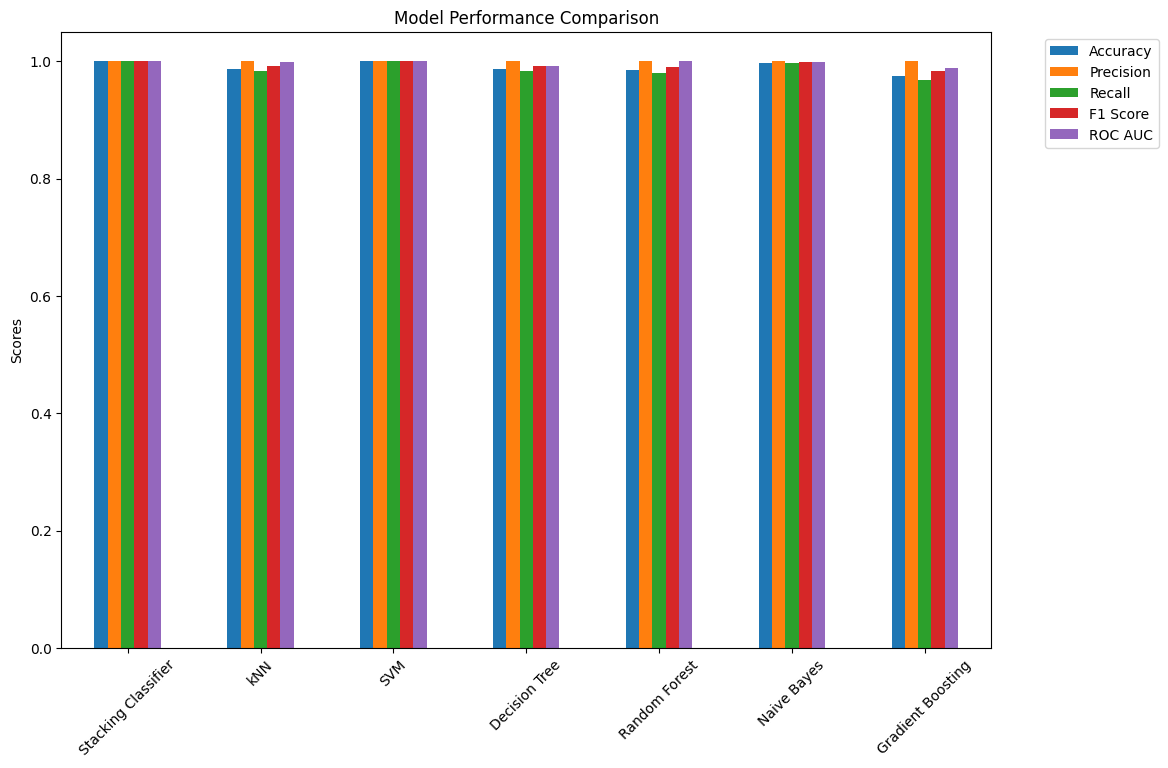

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Step 1: Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Step 2: Preprocessing
X = df.drop(['Disease_Risk'], axis=1)
y = df['Disease_Risk']

# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Define Base Models and Meta-Model
base_models = [
    ('kNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Meta-Model
meta_model = LogisticRegression()

# Step 4: Initialize Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Step 5: Train Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Step 6: Evaluate Stacking Classifier
y_pred = stacking_clf.predict(X_test)
y_prob = stacking_clf.predict_proba(X_test)[:, 1]

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust 'binary' or 'weighted' depending on target
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_prob)

# Results Dictionary
results = {
    'Stacking Classifier': {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }
}

# Print Results
print("Stacking Classifier Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(classification_report(y_test, y_pred))

# Step 7: Plot ROC Curve
roc_auc_curves = plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'Stacking Classifier (AUC = {roc_auc:.2f})')

# Add random guessing line
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 8: Compare with Base Models
# Evaluate base models for comparison
for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    # Add to ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Step 9: Final ROC Curve with Base Models
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Stacking Classifier vs Base Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 10: Display Results
results_df = pd.DataFrame(results).T  # Transpose to make models as rows
print("Model Comparison:")
print(results_df)

# Step 11: Visualize Results
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [3]:
# Step 12: Select the Best Model
# Identify the best model based on ROC AUC
best_model_name = results_df['ROC AUC'].idxmax()  # Get the name of the best model
best_model_performance = results_df.loc[best_model_name]  # Get its performance metrics
best_model = dict(base_models + [('Stacking Classifier', stacking_clf)])[best_model_name]

# Print the best model details
print(f"\nBest Model: {best_model_name}")
print(f"Performance Metrics:\n{best_model_performance}\n")



Best Model: Stacking Classifier
Performance Metrics:
Accuracy     1.0
Precision    1.0
Recall       1.0
F1 Score     1.0
ROC AUC      1.0
Name: Stacking Classifier, dtype: float64



In [4]:
# Step 13: Interpret the Best Model with LIME
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train, 
    mode='classification', 
    training_labels=y_train, 
    feature_names=df.columns[:-1],
    verbose=True
)

# Explain a prediction from the best model
sample_index = 0  # Select a test sample index for explanation
sample = X_test[sample_index].reshape(1, -1)
lime_exp = lime_explainer.explain_instance(
    X_test[sample_index], 
    best_model.predict_proba if hasattr(best_model, "predict_proba") else best_model.decision_function
)
lime_exp.show_in_notebook(show_table=True)

Intercept 2.446103158964811
Prediction_local [0.73032767]
Right: 0.013090075242935493


PermutationExplainer explainer: 385it [01:29,  3.88it/s]                         


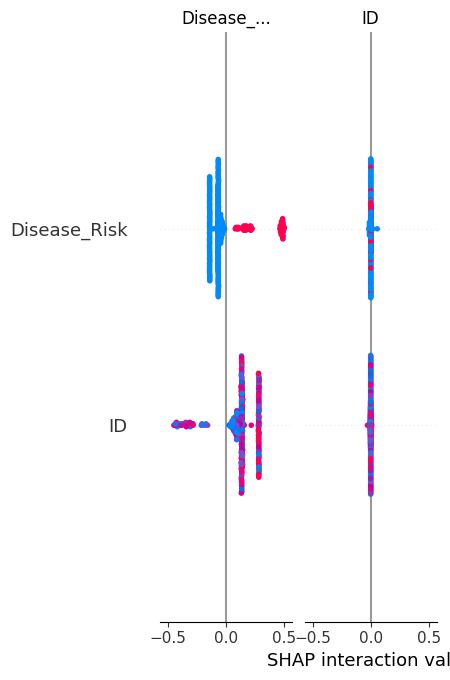

In [8]:
import shap

# Step 14: Interpret the Best Model with SHAP
# Wrapper for predict_proba to make the model callable
class StackingModelWrapper:
    def __init__(self, model):
        self.model = model

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def __call__(self, X):
        return self.predict_proba(X)

# Wrap the stacking classifier
wrapped_model = StackingModelWrapper(stacking_clf)

# Initialize SHAP explainer
shap_explainer = shap.Explainer(wrapped_model, X_train)
shap_values = shap_explainer(X_test)

# Visualize SHAP values for the first prediction
shap.initjs()

# Use shap_values directly without accessing expected_value
sample_index = 0  # Specify the index of the sample you want to visualize
shap.force_plot(shap_values[0].values, shap_values[0].data, feature_names=df.columns[:-1])

# Summary plot for all features
shap.summary_plot(shap_values, X_test, feature_names=df.columns[:-1])


c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100/100 [05:54<00:00,  3.54s/it]


<Figure size 1200x800 with 0 Axes>

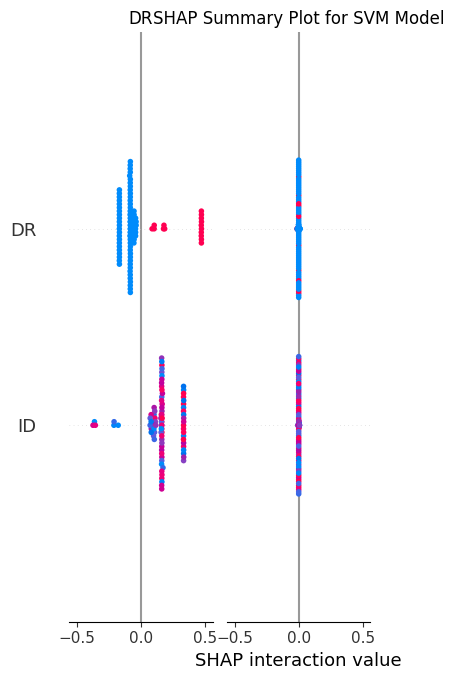

In [3]:
import shap
import matplotlib.pyplot as plt

# Step 7: Select the SVM Model for SHAP explanations
selected_model = models['SVM']  # Using the already trained SVM model

# Step 8: Initialize SHAP KernelExplainer for the SVM Model
# Use a smaller subset of X_train as background data for efficiency
background_data = shap.sample(X_train, 100, random_state=42)  # Sample background data
explainer = shap.KernelExplainer(selected_model.predict_proba, background_data)

# Step 9: Calculate SHAP values for the test subset (first 100 instances)
shap_values = explainer.shap_values(X_test[:100])

# Step 10: SHAP Summary Plot
# Check if shap_values is a list (indicating class separation in binary classification)
plt.figure(figsize=(12, 8))  # Set figure size for better visibility
if isinstance(shap_values, list) and len(shap_values) > 1:
    shap.summary_plot(shap_values[1], X_test[:100], feature_names=X.columns, show=False)  # For the second class
else:
    shap.summary_plot(shap_values, X_test[:100], feature_names=X.columns, show=False)

plt.title("SHAP Summary Plot for SVM Model")  # Add title for clarity
plt.show()  # Display the plot


In [4]:
from lime import lime_tabular  
# Step 7: LIME Analysis for SVM
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    mode='classification',
    feature_names=X.columns,
    class_names=['No Risk', 'Risk'],  
    discretize_continuous=True
)

# Explain a specific prediction (e.g., the first instance in X_test)
i = 0  # Index of the instance to explain
exp = explainer.explain_instance(X_test[i], models['SVM'].predict_proba)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)